# THE SPARK FOUNDATION INTERNSHIP
By: Manisha Anand

##Task 2 : Supervised Machine Learning Algorithm

*Simple Linear Regression*

Simple Linear Regression is a linear regression model with a single explanatory variable. That is, it concerns two-dimensional sample points with one independent variable and one dependent variable and finds a linear function that, as accurately as possible, predicts the dependent variable values as a function of the independent variable.

The formula for simple Linear Regression is: *$y = mX + \beta_0 $*

where: 

$y$ -- the dependent variable (the one we're trying to predict)

$X$ -- the independent variable (the one we're using as a predictor for y)

$\beta_0 $ -- the intercept

$m$ -- the coefficient of $X$; it tells us how much y will change for a unit change in x

$m$ and $\beta_0$ are the model coefficients, this values are learned during the model fitting process.


*Our Objective:*

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied,this is a simple linear regression task as it involves just two variables.

In [1]:
# Importing neccessary libraries for doing the task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as seabornInstance

In [2]:
# Reading the dataset from the given url
dataset = pd.read_csv("http://bit.ly/w-data")
dataset.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# EDA of DATASET

In [3]:
dataset.describe().T   

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [4]:
#Correlation Analysis
correlation=dataset.corr()
correlation

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


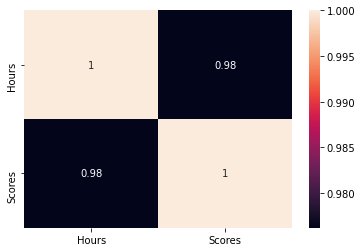

In [5]:
sns.heatmap(dataset.corr(),annot=True)

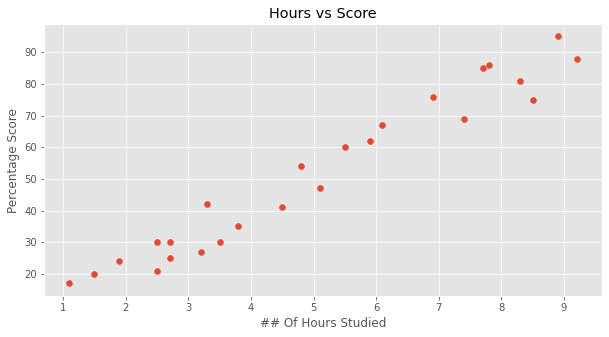

In [6]:
#Plotting the distribution of scores
plt.style.use("ggplot")
plt.rcParams["figure.figsize"] = 10, 5
plt.scatter(data=dataset, x="Hours", y="Scores")
plt.title("Hours vs Score")
plt.xlabel("## Of Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

=> From the graph we can clearly see that there is a positive linear relation between the hours and percentage of scores. 

=> As, the study hours increases, the scores impoves. 

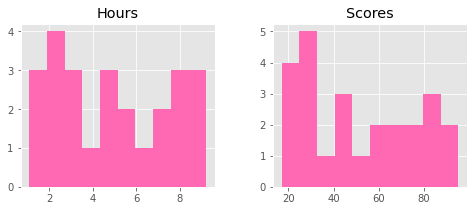

In [7]:
##PLOT
dataset.hist(figsize = (8,3),color='hotpink')
plt.style.use('ggplot')
plt.show()

=> We observed that the average maximum percentage of scores is between 20 and 40 with respect to hours of study.

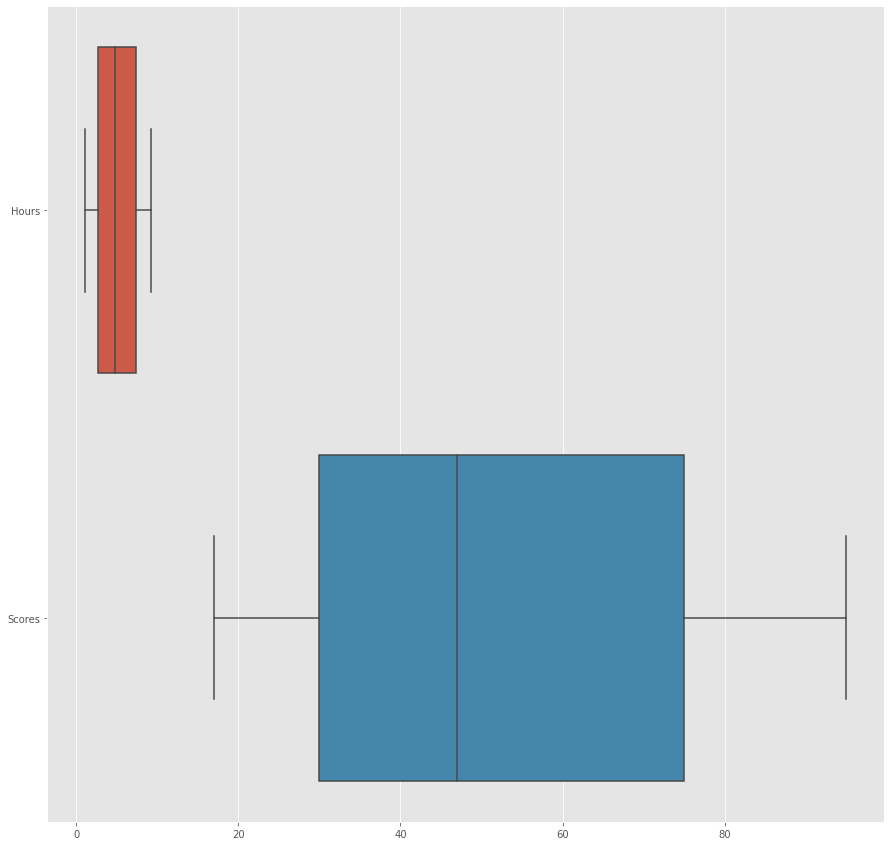

In [8]:
plt.figure(figsize=(15,15)) 
sns.boxplot(data = dataset,width=.8,orient="h") 

# Data Preparation

In [9]:
#Training and Testing DATASETS
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values

In [10]:
# Now we have our X and y we will do train/test split
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Training Our Model

In [11]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [12]:
print(regressor.intercept_)

2.018160041434662


In [13]:
print(regressor.coef_)

[9.91065648]


# Predictons

In [14]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [15]:
dataset = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dataset

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


This suggest that our model is not very precise, the predicted percentages are close to the actual ones.

# DATA VISUALIZATION

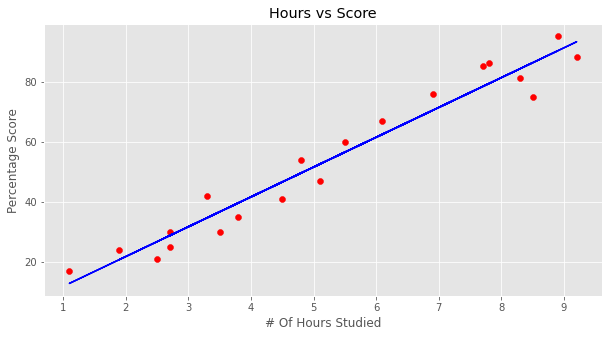

In [16]:
# Visualising the Training set results
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Hours vs Score")
plt.xlabel("# Of Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

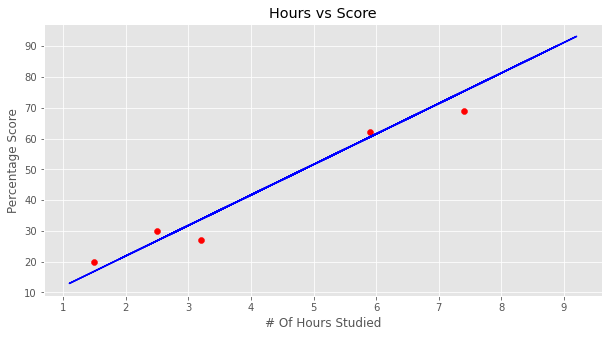

In [17]:
# Visualising the Test set results
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title("Hours vs Score")
plt.xlabel("# Of Hours Studied")
plt.ylabel("Percentage Score")
plt.show()

The straight line in the above graph shows our algorithm is correct.

In [18]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.183859899002982
Mean Squared Error: 21.598769307217456
Root Mean Squared Error: 4.647447612100373


# Conclusion

The final step is to evaluate the performance of algorithm.This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean squared error.There are many such metrics.

The value of root mean squared error is 4.64. It is less than 10% of the mean value of the percentage of all the student i.e.51.48.

# -------------------------------------Thank -You------------------------------------------